In [28]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
for dirname, _,filenames in os.walk("/kaggle/input"):
    for filename in filename:
        print (os.path.join(dirname,filename))

In [2]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


In [3]:
data_path = 'C:/Programacion_Analitica/trabajo final/Arrests.csv'
df = pd.read_csv(data_path)

df.head()

,Unnamed: 0,released,colour,year,age,sex,employed,citizen,checks
0,1,Yes,White,2002,21,Male,Yes,Yes,3
1,2,No,Black,1999,17,Male,Yes,Yes,3
2,3,Yes,White,2000,24,Male,Yes,Yes,3
3,4,No,Black,2000,46,Male,Yes,Yes,1
4,5,Yes,Black,1999,27,Female,Yes,Yes,1


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,released,colour,year,age,sex,employed,citizen,checks
0,Yes,White,2002,21,Male,Yes,Yes,3
1,No,Black,1999,17,Male,Yes,Yes,3
2,Yes,White,2000,24,Male,Yes,Yes,3
3,No,Black,2000,46,Male,Yes,Yes,1
4,Yes,Black,1999,27,Female,Yes,Yes,1


In [5]:
df['released']

0       Yes
1        No
2       Yes
3        No
4       Yes
       ... 
5221    Yes
5222    Yes
5223    Yes
5224     No
5225    Yes
Name: released, Length: 5226, dtype: object

In [6]:
fig = px.histogram(df['released'])

fig.show()

In [7]:
fig = px.histogram(df['colour'])

colour_counts = df['colour'].value_counts()
labels = colour_counts.index
values = colour_counts.values
colors = ['#F9F6B7', '#9F5325']

pie = go.Pie(labels=labels, values=values, marker=dict(colors=colors))
layout = go.Layout(title='Distribution of race of arrests for marijuana')
fig = go.Figure(data=[pie],
                layout=layout)

fig.update_traces(hoverinfo='label+percent',
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.show()

In [8]:
fig = px.histogram(df['age'], marginal='violin')

fig.update_layout(title='Distribution of age when arrested for marijuana')

fig.show()

In [10]:
year_count = df['year'].value_counts()
year_count = year_count.reindex([1997, 1998, 1999, 2000, 2001, 2002])

bar = go.Bar(x=year_count.index,
             y=year_count.values,
             marker=dict(color=year_count.values, colorscale='Reds', showscale=True))

layout = go.Layout(title='Number of arrests by year')

fig = go.Figure(data=[bar], layout=layout)

fig.show()

In [11]:
def get_years_arrested(df):
    '''
    How long the person had been incarcerated for (if not yet released).
    Data was taken in 2003
    '''
    years_in = np.nan
    if df['released'] == 'Yes':
        years_in = np.nan
    else:
        years_in = 2003 - df['year'] # A
        
    return years_in

df['years_in'] = df.apply(get_years_arrested, axis=1)

df.head()

,released,colour,year,age,sex,employed,citizen,checks,years_in
0,Yes,White,2002,21,Male,Yes,Yes,3,NaN
1,No,Black,1999,17,Male,Yes,Yes,3,4.0
2,Yes,White,2000,24,Male,Yes,Yes,3,NaN
3,No,Black,2000,46,Male,Yes,Yes,1,3.0
4,Yes,Black,1999,27,Female,Yes,Yes,1,NaN


In [12]:
fig = px.histogram(df['years_in'], marginal='violin')

fig.update_layout(title='Distribution of years of incarceration')

fig.show()

In [13]:
fig = px.histogram(df['checks'], marginal='violin')

fig.update_layout(title='Distribution of years of incarceration')

fig.show()

In [14]:
white = df[df['colour']=='White']
black = df[df['colour']=='Black']

count_white = white['employed'].value_counts()
count_black = black['employed'].value_counts()

pie_white = go.Pie(labels=count_white.index,
                   values=count_white.values,
                   name='White people', hole=0.4, domain={'x': [0, 0.46]})

pie_black = go.Pie(labels=count_black.index,
                   values=count_black.values,
                   name='Black people', hole=0.4, domain={'x': [0.53, 1]})

layout = dict(title='Distribution of employment status among arrested white and black people',
              legend=dict(orientation='h'),
              annotations=[dict(x=0.2, y=0.5, text='White', showarrow=False, font=dict(size=20)),
                           dict(x=0.8, y=0.5, text='Black', showarrow=False, font=dict(size=20))])

fig = go.Figure(data=[pie_white, pie_black], layout=layout)

fig.show()

In [15]:
employed = df[df['employed']=='Yes']
unemployed = df[df['employed']=='No']

mean_time_employed_by_checks = employed.groupby('checks')['years_in'].aggregate('mean')
mean_time_unemployed_by_checks = unemployed.groupby('checks')['years_in'].aggregate('mean')

In [17]:
bar_employed = go.Bar(x=mean_time_employed_by_checks.index,
                      y=mean_time_employed_by_checks.values,
                      marker=dict(color=mean_time_employed_by_checks.values, colorscale='Reds', showscale=False))

bar_unemployed = go.Bar(x=mean_time_unemployed_by_checks.index,
                      y=mean_time_unemployed_by_checks.values,
                      marker=dict(color=mean_time_unemployed_by_checks.values, colorscale='Blues', showscale=False))

fig = make_subplots(rows=2, cols=1)
fig.add_trace(bar_employed, row=1, col=1)
fig.add_trace(bar_unemployed, row=2, col=1)

fig.update_layout(title='Mean prison time employed and unemployed by checks',
                  height=600)

fig.update_xaxes(title_text='#Checks for arrested and employed', row=1, col=1)
fig.update_yaxes(title_text='Mean Prison Time', row=1, col=1)

fig.update_xaxes(title_text='#Checks for arrested and unemployed', row=2, col=1)
fig.update_yaxes(title_text='Mean Prison Time', row=2, col=1)

fig.show()

In [18]:
arrest_count = df.groupby('year').size()
arrest_count

fig = px.bar(x=arrest_count.index,
             y=arrest_count.values)

fig.update_layout(title='Distribution of arrests per year')

fig.show()

In [19]:
df.head()

,released,colour,year,age,sex,employed,citizen,checks,years_in
0,Yes,White,2002,21,Male,Yes,Yes,3,NaN
1,No,Black,1999,17,Male,Yes,Yes,3,4.0
2,Yes,White,2000,24,Male,Yes,Yes,3,NaN
3,No,Black,2000,46,Male,Yes,Yes,1,3.0
4,Yes,Black,1999,27,Female,Yes,Yes,1,NaN


In [20]:
aby = df.groupby(['year', 'colour']).size().unstack() # arrests_by_year
aby['Black']

year
1997    123
1998    240
1999    250
2000    279
2001    311
2002     85
Name: Black, dtype: int64

In [21]:
black_aby = go.Bar(x=aby.index,
                   y=aby['Black'],
                   name='Black arrests',
                   marker=dict(color='#9F5325'))
white_aby = go.Bar(x=aby.index,
                   y=aby['White'],
                   name='White arrests',
                   marker=dict(color='#F9F6B7'))

layout = go.Layout(title='Arrests by race per year',
                   yaxis=dict(title='Arrests count'))

fig = go.Figure(data=[black_aby, white_aby],
                layout=layout)

fig.show()

In [22]:
aby_gender = df.groupby(['year', 'sex']).size().unstack()
aby_gender['Female']

year
1997     32
1998     95
1999    100
2000    105
2001     93
2002     18
Name: Female, dtype: int64

In [23]:
male_aby = go.Bar(x=aby_gender.index,
                  y=aby_gender['Male'],
                  name='Male arrests',
                  marker=dict(color=aby_gender['Male'], colorscale='mint', showscale=False))
female_aby = go.Bar(x=aby_gender.index,
                    y=aby_gender['Female'],
                    name='Female arrests',
                    marker=dict(color=aby_gender['Female'], colorscale='peach', showscale=False))

layout = go.Layout(title='Arrests by gender per year',
                   yaxis=dict(title='Arrests count'))

fig = go.Figure(data=[male_aby, female_aby],
                layout=layout)

fig.show()

In [24]:
age_gender = df.groupby('sex')['age'].mean()
age_gender
arrest_count = df.groupby('year').size()
arrest_count

fig = px.bar(x=age_gender.index,
             y=age_gender.values)

fig.update_layout(title='mean age of arrest by gender')

fig.show()


In [25]:
age_gender = df.groupby('year')['age'].mean()
age_gender
arrest_count = df.groupby('year').size()
arrest_count

fig = go.Bar(x=age_gender.index,
             y=age_gender.values,
             marker=dict(color=age_gender.values, colorscale='greens', showscale=True))

layout = go.Layout(title='Average age of arrest by year',
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='Average age'))

fig = go.Figure(data=fig, layout=layout)

fig.show()

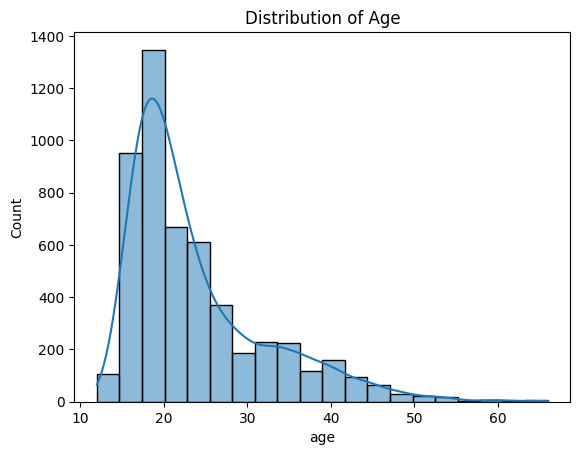

In [31]:
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

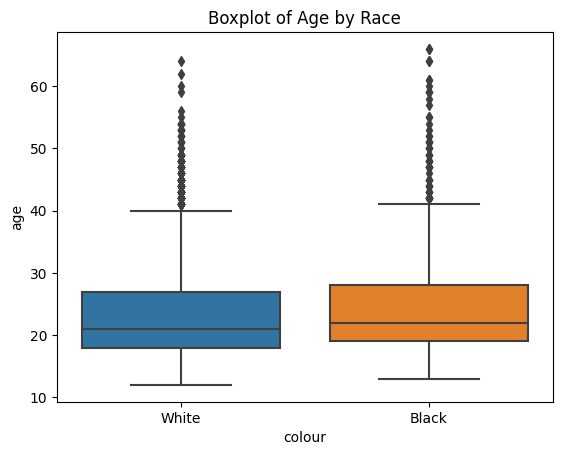

In [30]:
sns.boxplot(data=df, x='colour', y='age')
plt.title('Boxplot of Age by Race')
plt.show()

<Axes: xlabel='checks', ylabel='age'>

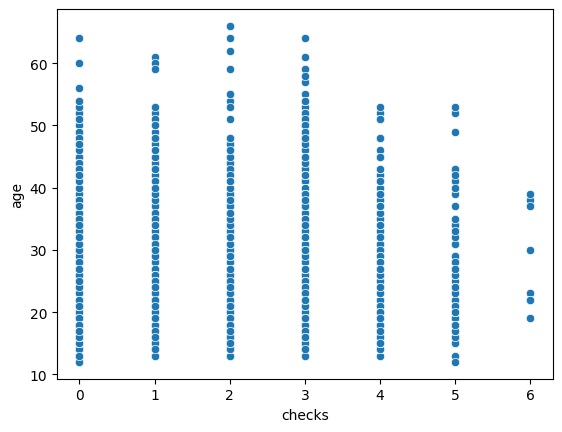

In [33]:
sns.scatterplot(y='age',x='checks', data=df)